## Import libraries

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import re

## Load cleaned dataset

In [60]:
df = pd.read_csv('../data/processed/DataScientist_cleaned.csv')

## Select and Encode Features

In [61]:
# Select relevant features for prediction
features = ['Rating', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Easy Apply']

# Handle categorical features by encoding them
categorical_features = ['Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Easy Apply']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

## Handle Missing Values

In [62]:
# Impute missing values
# For numerical columns, use mean value
imputer = SimpleImputer(strategy='mean')  
df['Rating'] = imputer.fit_transform(df[['Rating']])
df['Founded'] = imputer.fit_transform(df[['Founded']])

# For categorical columns, use the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
for col in categorical_features:
    df[col] = imputer.fit_transform(df[[col]])


## Build and Evaluate Linear Regressor

In [63]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)

# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R2: {r2_lr}')


Linear Regression MSE: 1482.9386666090406
Linear Regression R2: 0.01580737573243529


## Build and Evaluate Decision Tree Regressor

In [64]:
# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

# Evaluate Decision Tree
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f'Decision Tree MSE: {mse_tree}')
print(f'Decision Tree R2: {r2_tree}')


Decision Tree MSE: 2045.7333282073937
Decision Tree R2: -0.357706625483023


## Build and Evaluate Random Forest Regressor

In [65]:
# Random Forest Regression
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)

# Evaluate Random Forest
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print(f'Random Forest MSE: {mse_forest}')
print(f'Random Forest R2: {r2_forest}')


Random Forest MSE: 1502.5785139232196
Random Forest R2: 0.0027728562991023997


## Visualize Model Performance

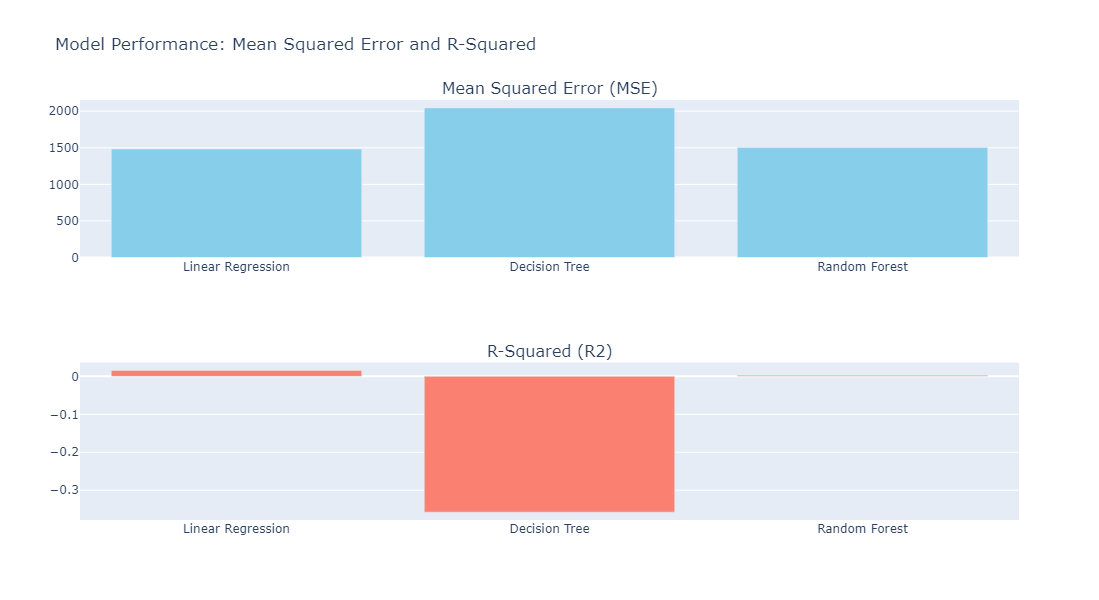

In [70]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [mse_lr, mse_tree, mse_forest]
r2_values = [r2_lr, r2_tree, r2_forest]

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Mean Squared Error (MSE)', 'R-Squared (R2)')
)

fig.add_trace(go.Bar(
    x=models,
    y=mse_values,
    name='Mean Squared Error (MSE)',
    marker_color='skyblue'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=models,
    y=r2_values,
    name='R-Squared (R2)',
    marker_color='salmon'
), row=2, col=1)

fig.update_layout(
    height=600,
    title='Model Performance: Mean Squared Error and R-Squared',
    showlegend=False
)

fig.show()

## Scatter Plot with Regression line

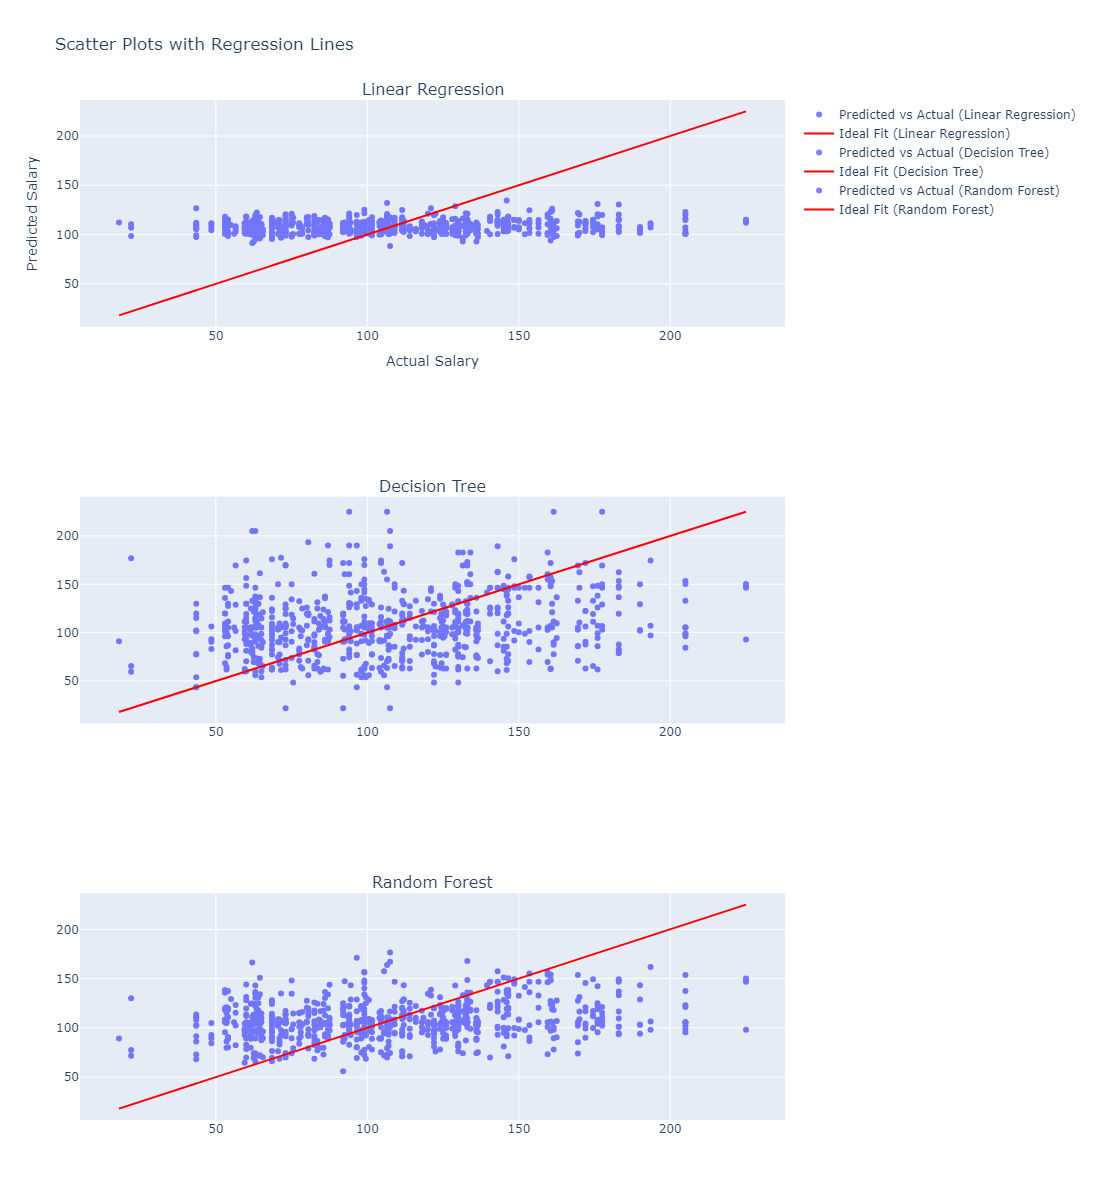

In [74]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=('Linear Regression', 'Decision Tree', 'Random Forest')
)

# Scatter Plot with Regression Line for Linear Regression
fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred_lr,
    mode='markers',
    name='Predicted vs Actual (Linear Regression)',
    opacity=0.5,
    marker=dict(color='blue')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=y_test,
    y=y_test,
    mode='lines',
    name='Ideal Fit (Linear Regression)',
    line=dict(color='red')
), row=1, col=1)

# Scatter Plot with Regression Line for Decision Tree
fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred_tree,
    mode='markers',
    name='Predicted vs Actual (Decision Tree)',
    opacity=0.5,
    marker=dict(color='blue')
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=y_test,
    y=y_test,
    mode='lines',
    name='Ideal Fit (Decision Tree)',
    line=dict(color='red')
), row=2, col=1)

# Scatter Plot with Regression Line for Random Forest
fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred_forest,
    mode='markers',
    name='Predicted vs Actual (Random Forest)',
    opacity=0.5,
    marker=dict(color='blue')
), row=3, col=1)

fig.add_trace(go.Scatter(
    x=y_test,
    y=y_test,
    mode='lines',
    name='Ideal Fit (Random Forest)',
    line=dict(color='red')
), row=3, col=1)

# Update layout
fig.update_layout(
    height=1200,
    title='Scatter Plots with Regression Lines',
    xaxis_title='Actual Salary',
    yaxis_title='Predicted Salary'
)

# Show the interactive plot
fig.show()


## Resodual Plot

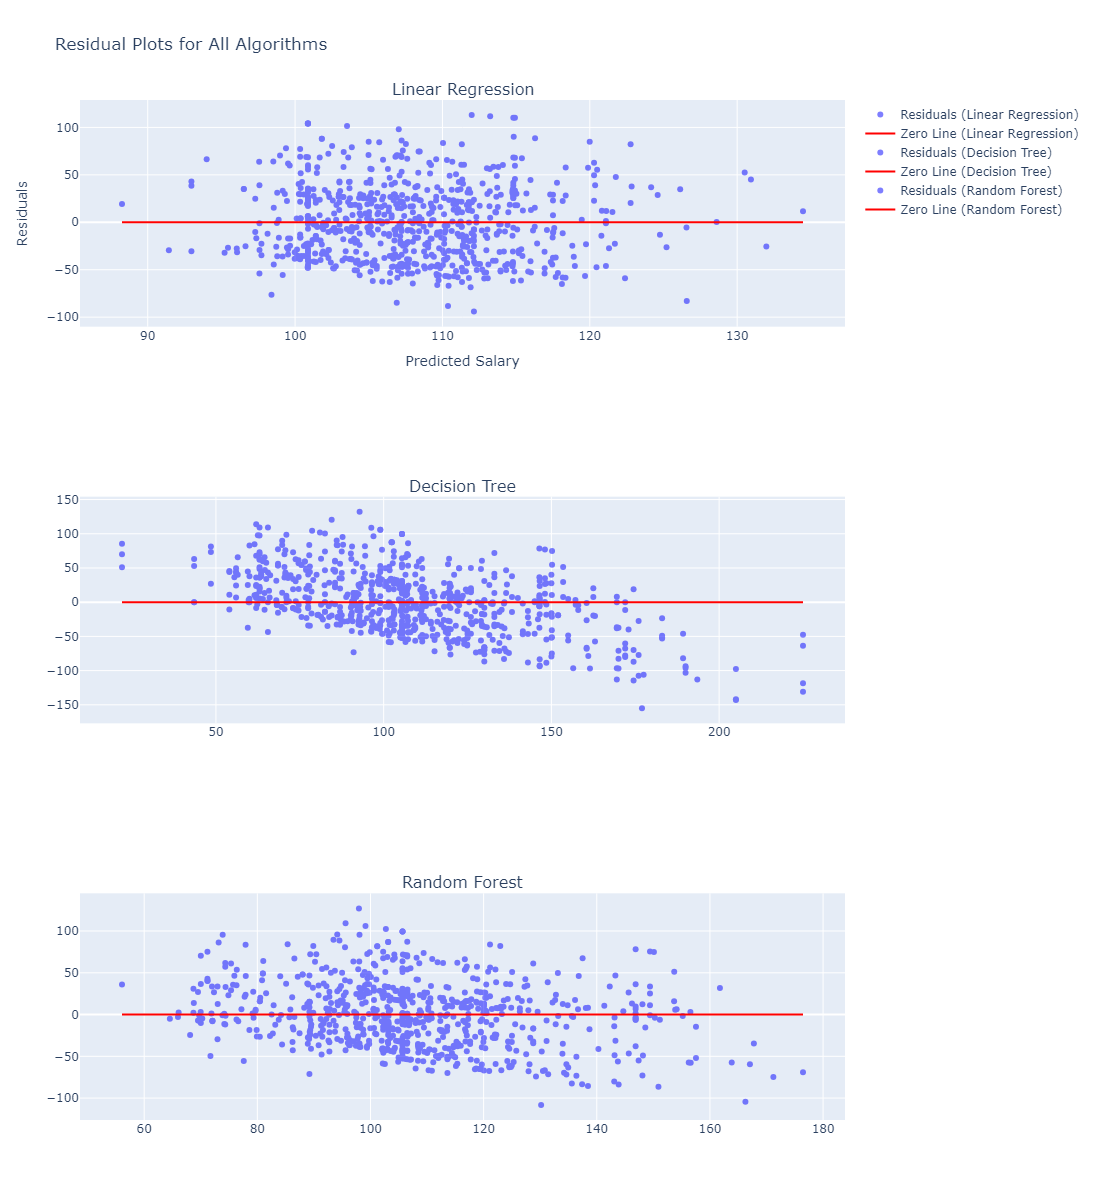

In [77]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Calculate residuals for all models
residuals_lr = y_test - y_pred_lr
residuals_tree = y_test - y_pred_tree
residuals_forest = y_test - y_pred_forest

# Create subplots
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=('Linear Regression', 'Decision Tree', 'Random Forest')
)

# Residual Plot for Linear Regression
fig.add_trace(go.Scatter(
    x=y_pred_lr,
    y=residuals_lr,
    mode='markers',
    name='Residuals (Linear Regression)',
    opacity=0.5,
    marker=dict(color='blue')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=[min(y_pred_lr), max(y_pred_lr)],
    y=[0, 0],
    mode='lines',
    name='Zero Line (Linear Regression)',
    line=dict(color='red')
), row=1, col=1)

# Residual Plot for Decision Tree
fig.add_trace(go.Scatter(
    x=y_pred_tree,
    y=residuals_tree,
    mode='markers',
    name='Residuals (Decision Tree)',
    opacity=0.5,
    marker=dict(color='blue')
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=[min(y_pred_tree), max(y_pred_tree)],
    y=[0, 0],
    mode='lines',
    name='Zero Line (Decision Tree)',
    line=dict(color='red')
), row=2, col=1)

# Residual Plot for Random Forest
fig.add_trace(go.Scatter(
    x=y_pred_forest,
    y=residuals_forest,
    mode='markers',
    name='Residuals (Random Forest)',
    opacity=0.5,
    marker=dict(color='blue')
), row=3, col=1)

fig.add_trace(go.Scatter(
    x=[min(y_pred_forest), max(y_pred_forest)],
    y=[0, 0],
    mode='lines',
    name='Zero Line (Random Forest)',
    line=dict(color='red')
), row=3, col=1)

# Update layout
fig.update_layout(
    height=1200,
    title='Residual Plots for All Algorithms',
    xaxis_title='Predicted Salary',
    yaxis_title='Residuals'
)

# Show the interactive plot
fig.show()


## Actual vs Predicted Values

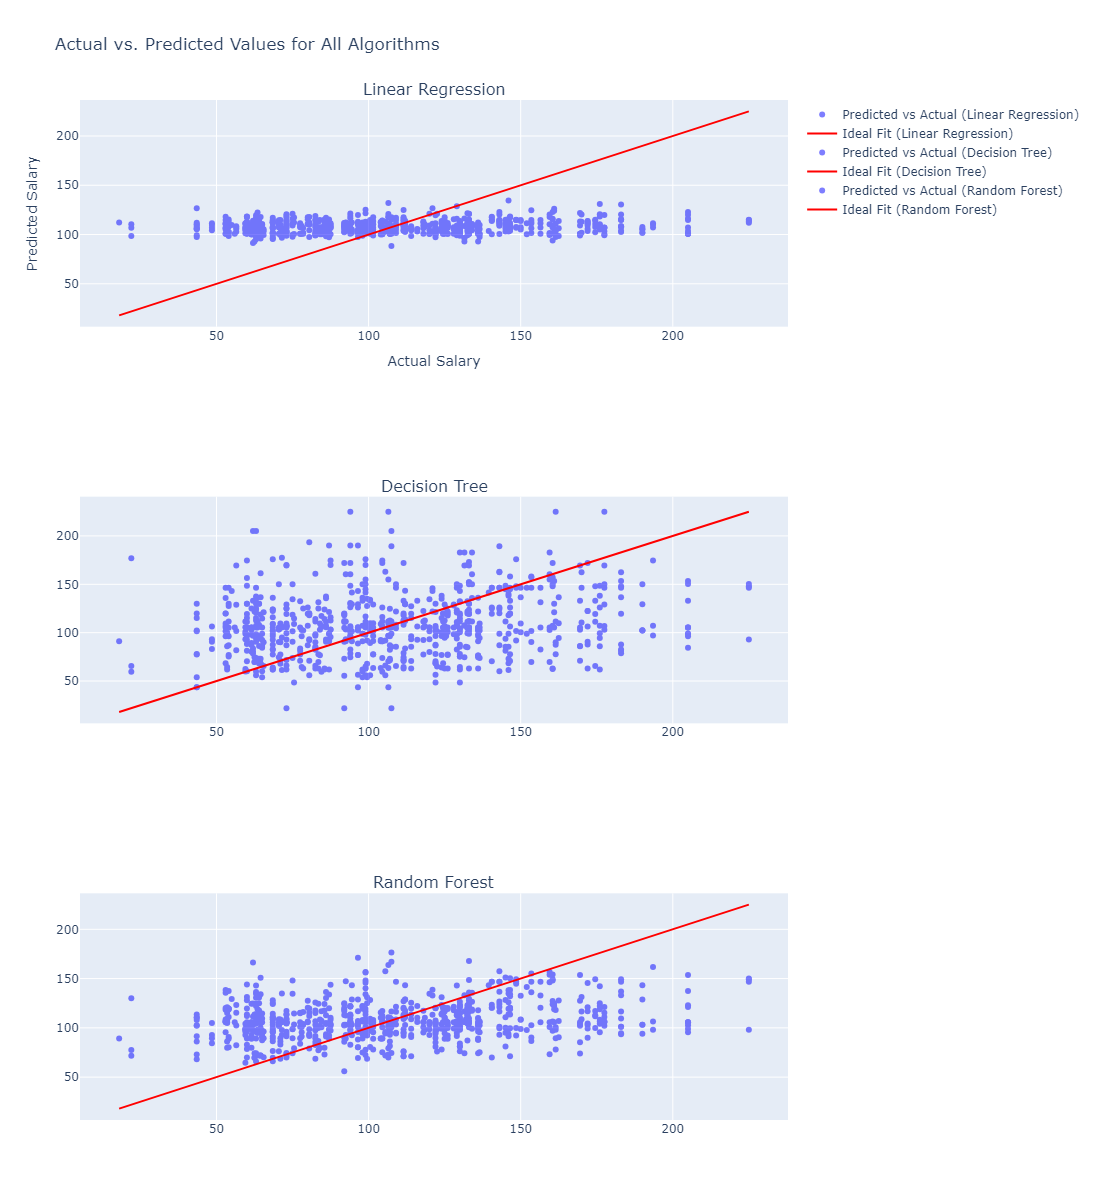

In [78]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=('Linear Regression', 'Decision Tree', 'Random Forest')
)

# Actual vs. Predicted Values for Linear Regression
fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred_lr,
    mode='markers',
    name='Predicted vs Actual (Linear Regression)',
    opacity=0.5,
    marker=dict(color='blue')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=[min(y_test), max(y_test)],
    y=[min(y_test), max(y_test)],
    mode='lines',
    name='Ideal Fit (Linear Regression)',
    line=dict(color='red')
), row=1, col=1)

# Actual vs. Predicted Values for Decision Tree
fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred_tree,
    mode='markers',
    name='Predicted vs Actual (Decision Tree)',
    opacity=0.5,
    marker=dict(color='blue')
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=[min(y_test), max(y_test)],
    y=[min(y_test), max(y_test)],
    mode='lines',
    name='Ideal Fit (Decision Tree)',
    line=dict(color='red')
), row=2, col=1)

# Actual vs. Predicted Values for Random Forest
fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred_forest,
    mode='markers',
    name='Predicted vs Actual (Random Forest)',
    opacity=0.5,
    marker=dict(color='blue')
), row=3, col=1)

fig.add_trace(go.Scatter(
    x=[min(y_test), max(y_test)],
    y=[min(y_test), max(y_test)],
    mode='lines',
    name='Ideal Fit (Random Forest)',
    line=dict(color='red')
), row=3, col=1)

# Update layout
fig.update_layout(
    height=1200,
    title='Actual vs. Predicted Values for All Algorithms',
    xaxis_title='Actual Salary',
    yaxis_title='Predicted Salary'
)

# Show the interactive plot
fig.show()


## Learning Curves

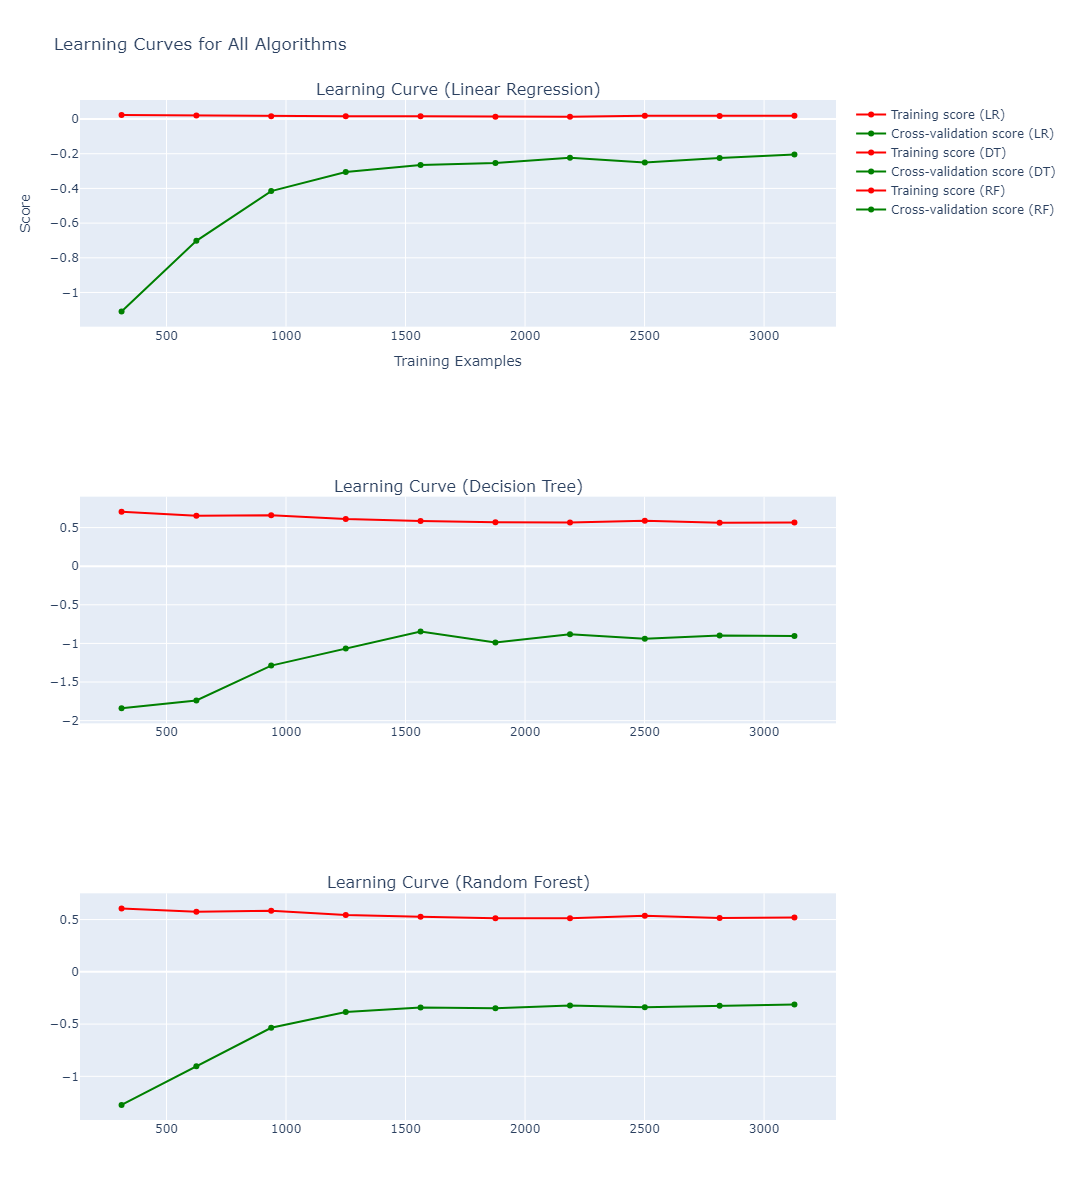

In [79]:
import numpy as np
from sklearn.model_selection import learning_curve
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    return train_sizes, train_scores_mean, test_scores_mean

# Generate learning curve data for each model
train_sizes_lr, train_scores_mean_lr, test_scores_mean_lr = plot_learning_curve(linear_reg, X, y, 'Learning Curve (Linear Regression)')
train_sizes_tree, train_scores_mean_tree, test_scores_mean_tree = plot_learning_curve(tree_reg, X, y, 'Learning Curve (Decision Tree)')
train_sizes_forest, train_scores_mean_forest, test_scores_mean_forest = plot_learning_curve(forest_reg, X, y, 'Learning Curve (Random Forest)')

# Create subplots
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=('Learning Curve (Linear Regression)', 'Learning Curve (Decision Tree)', 'Learning Curve (Random Forest)')
)

# Add Linear Regression learning curve
fig.add_trace(go.Scatter(
    x=train_sizes_lr,
    y=train_scores_mean_lr,
    mode='lines+markers',
    name='Training score (LR)',
    line=dict(color='red')
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=train_sizes_lr,
    y=test_scores_mean_lr,
    mode='lines+markers',
    name='Cross-validation score (LR)',
    line=dict(color='green')
), row=1, col=1)

# Add Decision Tree learning curve
fig.add_trace(go.Scatter(
    x=train_sizes_tree,
    y=train_scores_mean_tree,
    mode='lines+markers',
    name='Training score (DT)',
    line=dict(color='red')
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=train_sizes_tree,
    y=test_scores_mean_tree,
    mode='lines+markers',
    name='Cross-validation score (DT)',
    line=dict(color='green')
), row=2, col=1)

# Add Random Forest learning curve
fig.add_trace(go.Scatter(
    x=train_sizes_forest,
    y=train_scores_mean_forest,
    mode='lines+markers',
    name='Training score (RF)',
    line=dict(color='red')
), row=3, col=1)

fig.add_trace(go.Scatter(
    x=train_sizes_forest,
    y=test_scores_mean_forest,
    mode='lines+markers',
    name='Cross-validation score (RF)',
    line=dict(color='green')
), row=3, col=1)

# Update layout
fig.update_layout(
    height=1200,
    title='Learning Curves for All Algorithms',
    xaxis_title='Training Examples',
    yaxis_title='Score'
)

# Show the interactive plot
fig.show()


## Feature Importance

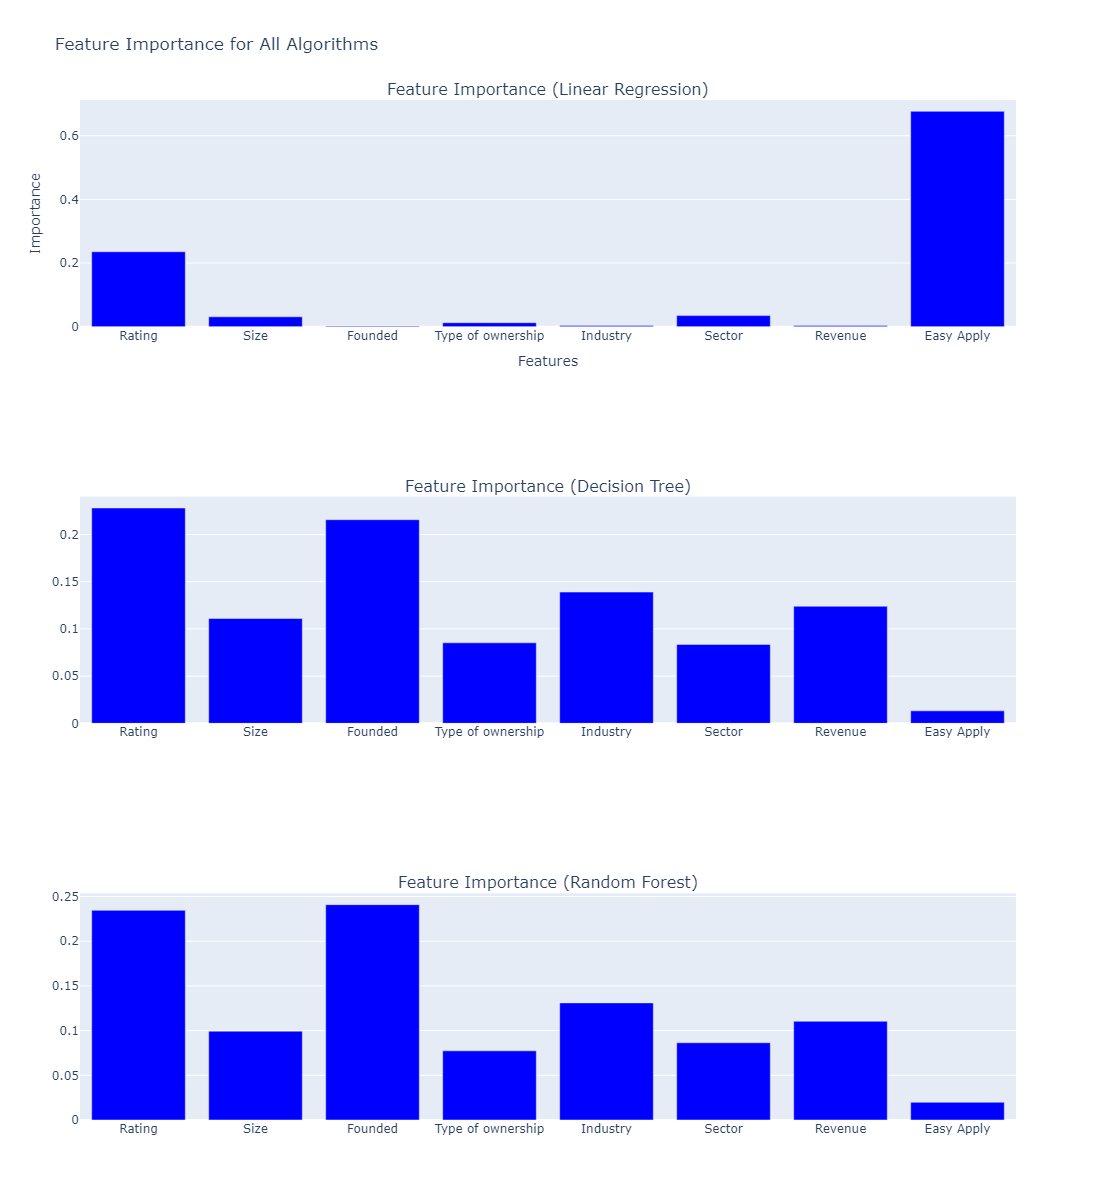

In [80]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Assuming `features` is already defined as the list of feature names
# Decision Tree and Random Forest feature importance
importances_tree = tree_reg.feature_importances_
importances_forest = forest_reg.feature_importances_

# Normalize importances for Linear Regression to use them as relative importance
coefficients_lr = np.abs(linear_reg.coef_)
importances_lr = coefficients_lr / coefficients_lr.sum()

# Create subplots
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=('Feature Importance (Linear Regression)', 'Feature Importance (Decision Tree)', 'Feature Importance (Random Forest)')
)

# Add Linear Regression feature importance
fig.add_trace(go.Bar(
    x=features,
    y=importances_lr,
    name='Feature Importance (LR)',
    marker_color='blue'
), row=1, col=1)

# Add Decision Tree feature importance
fig.add_trace(go.Bar(
    x=features,
    y=importances_tree,
    name='Feature Importance (DT)',
    marker_color='blue'
), row=2, col=1)

# Add Random Forest feature importance
fig.add_trace(go.Bar(
    x=features,
    y=importances_forest,
    name='Feature Importance (RF)',
    marker_color='blue'
), row=3, col=1)

# Update layout
fig.update_layout(
    height=1200,
    title='Feature Importance for All Algorithms',
    xaxis_title='Features',
    yaxis_title='Importance',
    showlegend=False
)

# Show the interactive plot
fig.show()
